In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
# Load data in a dataframe:


(6825, 15)


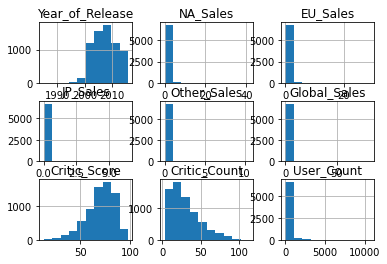

In [26]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv").dropna().drop('Name', axis='columns')
print(df.shape)
df.hist()

y = df['Global_Sales']
X = df.drop('Global_Sales',axis='columns') #for convinience

In [4]:
X_dummies = pd.get_dummies(X, columns=['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating'])
print(X_dummies.shape)

(6825, 1620)


In [5]:
#vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
#for i in range(9):
#    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

In [6]:
X_dummies['constant'] = [1]*X_dummies.shape[0] #for linear reg
#data = X_dummies.to_numpy()
Xtrain,Xtest,ytrain,ytest = train_test_split(X_dummies,y,random_state =0)

model = LinearRegression()
model.fit(Xtrain, ytrain)

print(model.score(Xtest, ytest))


0.9999883073308689


In [7]:
ridge_model = Ridge()
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    ridge_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

#print(results.best_score_)
print(results.best_params_)


-0.0048531903930483546
{'alpha': 0.55}


In [10]:
grid['alpha'] = 10.0**np.arange(0, 10)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    ridge_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

#print(results.best_score_)
print(results.best_params_)


{'alpha': 1.0}


In [9]:
updated_ridge_model = Ridge(alpha=0.55)
updated_ridge_model.fit(Xtrain, ytrain)

print(updated_ridge_model.score(Xtest, ytest))

0.9999887443314822


In [11]:
updated_ridge_model = Ridge(alpha=1)
updated_ridge_model.fit(Xtrain, ytrain)

print(updated_ridge_model.score(Xtest, ytest))

0.9999882697000435


In [12]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    lasso_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

#print(results.best_score_)
print(results.best_params_)


C:\Users\bg0ttkv\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\bg0ttkv\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


{'alpha': 0.0}


In [13]:
grid['alpha'] = 10.0**np.arange(0, 10)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    lasso_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

#print(results.best_score_)
print(results.best_params_)
print(results.best_estimator_.named_steps['model'].coef_)

{'alpha': 1.0}


In [23]:
coefficients = search.best_estimator_.coef_
importance = np.abs(coefficients)
print(search.best_estimator_.coef_)

nonzero_coefs = 0
for c in coefficients:
    if c != 0:
        nonzero_coefs +=1

print(nonzero_coefs)

[ 0.75540576  0.          0.         ...  0.         -0.
  0.        ]
4


In [28]:
updated_lasso_model = Lasso(alpha=1.0)
updated_lasso_model.fit(Xtrain, ytrain)

print(np.array(X_dummies.columns)[importance > 0])

print(updated_ridge_model.score(Xtest, ytest))

['NA_Sales' 'Critic_Score' 'Critic_Count' 'User_Count']
0.9999882697000435
